In [8]:
using DifferentialEquations
using Plots, LaTeXStrings
using Markdown
using Printf

┌ Info: Saved animation to 
│   fn = c:\Users\vital\git_projects\double-pendulum\anim.gif
└ @ Plots C:\Users\vital\.julia\packages\Plots\9C6z9\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\vital\\git_projects\\double-pendulum\\anim.gif")
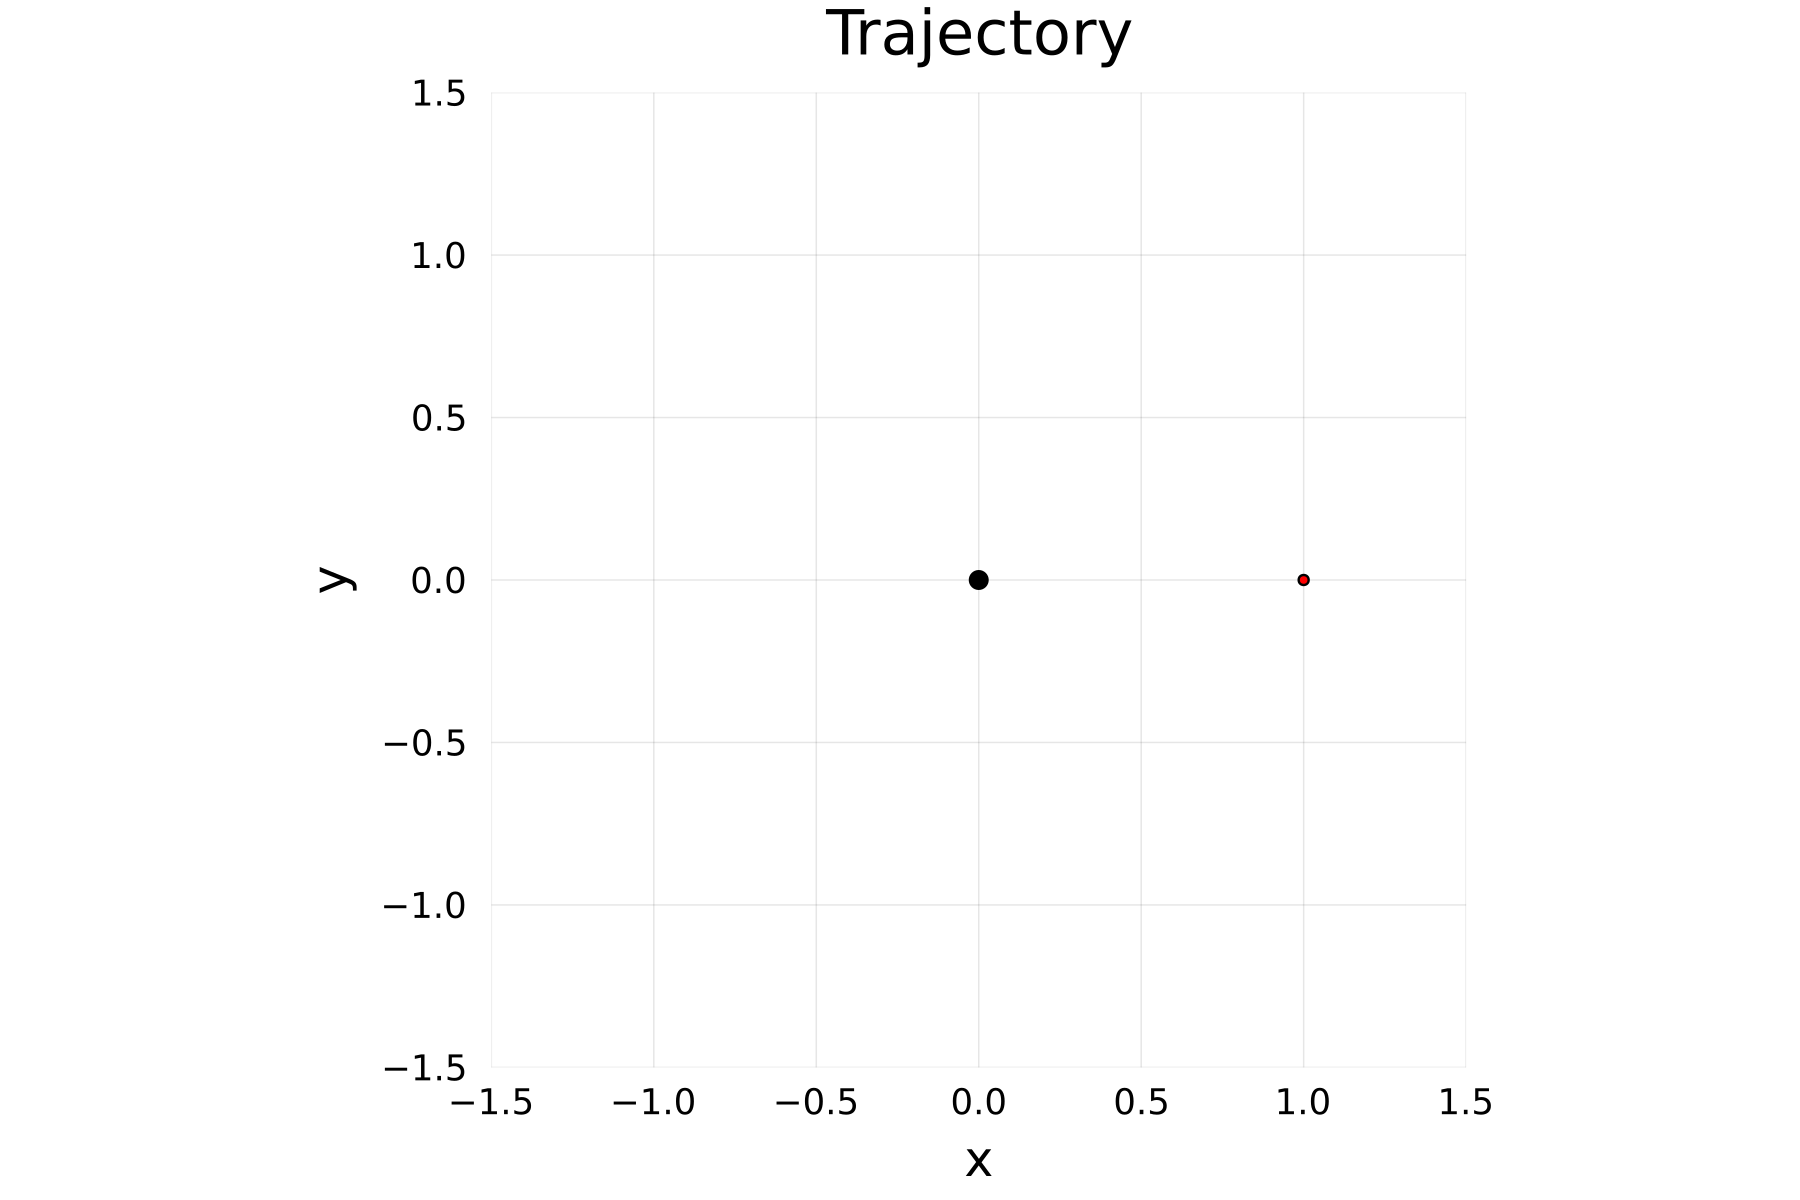

In [9]:
@userplot orbitanim
@recipe function f!(oa::orbitanim)
    x, y = oa.args
    title --> "Trajectory"
    xaxis --> ("x", (-1.5,1.5))
    yaxis --> ("y", (-1.5, 1.5))
    markersize --> 2
    markercolor --> "red"
    seriestype --> :scatter
    legend --> :none
    framestyle --> :grid
    aspect_ratio --> 1
    dpi --> 300
    [x], [y]
end

function orbit_plot_example()

    # IC
    topo = 10
    ω = 2π * topo / 60
    x0 = 1
    v0 = -x0*ω
    u0 = 1

    # equations
    x(t) = x0*cos(ω*t) + u0*sin(ω*t) / ω
    y(t) = v0*sin(ω*t) / ω

    # time frame
    t = 0:0.1:6
    n = length(t)

    xpos = x.(t)
    ypos = y.(t)

    # animation
    pl = scatter((0, 0), markercolor="black")
    anim = @animate for i in 1:n

        # scatter!([xpos[i]], [ypos[i]], legend=:none, title="Trajectory",
        #         markersize=2, markercolor="blue",
        #         xaxis=("x", (-1.5,1.5)), yaxis=("y", (-1.5, 1.5)),
        #         framestyle=:grid, aspect_ratio=1, dpi=300)

        orbitanim!(pl, xpos[i], ypos[i])
        

    end

    gif(anim, "anim.gif", fps=15)

end

orbit_plot_example()

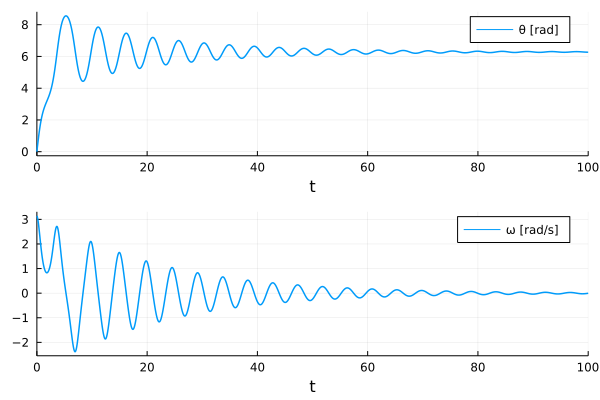

In [10]:
function pendulum_problem!(du, u, params, t)
    μ, g, len = params
    θ, ω = u
    du[1] = ω
    du[2] = -μ * ω - g / len * sin(θ)
end

θ₀ = 0
ω₀ = pi
u₀ = [θ₀, ω₀]

μ = 0.1
g = 9.8
len = 5
params = [μ, g, len]

tspan = (0.0, 100.0)

prob = ODEProblem(pendulum_problem!, u₀, tspan, params)
sol = solve(prob, reltol=1e-5, saveat=10e-3)

plot(sol, linewidth=1.5, layout=(2,1), label=["θ [rad]" "ω [rad/s]"], xaxis="t")

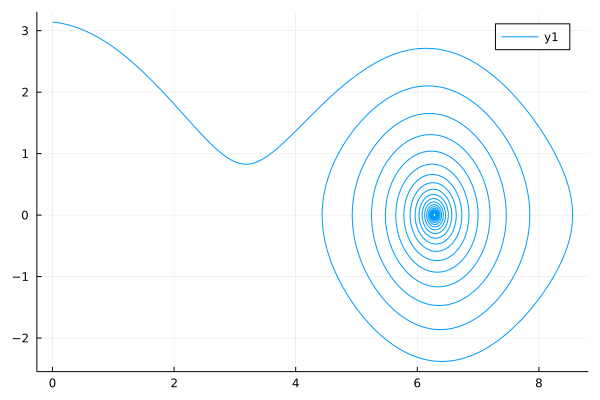

In [11]:
function vec_to_list(vecvec, dim) 
    vecvec[dim]
end

θ, ω = @. (vec_to_list(sol.u, 1), vec_to_list(sol.u, 2));
plot(θ, ω)

┌ Info: Saved animation to 
│   fn = c:\Users\vital\git_projects\double-pendulum\pendulum.gif
└ @ Plots C:\Users\vital\.julia\packages\Plots\9C6z9\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\vital\\git_projects\\double-pendulum\\pendulum.gif")
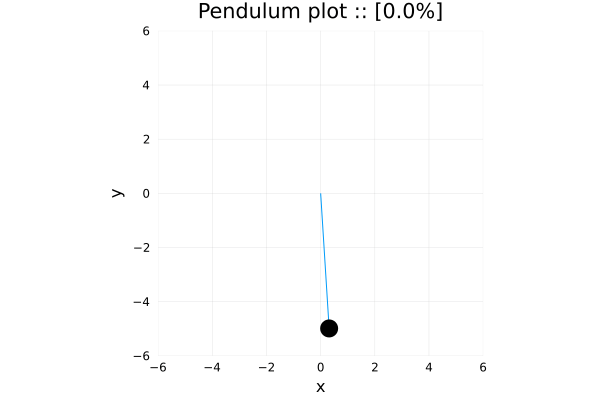

In [32]:
@userplot pendulumanim
@recipe function fpend!(oa::pendulumanim)
    θ, title_time = oa.args
    title --> "Pendulum plot :: [$(@sprintf("%2.1f", title_time))%]"
    xaxis --> ("x", (-6,6))
    yaxis --> ("y", (-6,6))
    markersize --> 10
    markercolor --> "black"
    seriestype --> :scatter
    legend --> :none
    framestyle --> :grid
    aspect_ratio --> 1
    dpi --> 100
    [abs(len) * sin(θ)], [-abs(len) * cos(θ)]
end

function pendulum_example()

    # time frame
    t = 0:0.02:40
    n = length(t)
    k = 3

    # animation
    anim = @animate for i in 1:n
        plot([0, abs(len) * sin(sol.u[k*i][1])], [0, -abs(len) * cos(sol.u[k*i][1])])
        pendulumanim!(sol.u[k*i][1], i/n * 100)
    end

    gif(anim, "pendulum.gif", fps=50)

end
pendulum_example()

In [13]:
function double_pendulum_problem!(du, u, params, t)
    m₁, m₂, g, len = params # μ₁, μ₂
    θ₁, θ₂, ω₁, ω₂ = u
    du[1] = ω₁
    du[2] = ω₂
    du[3] = -μ * ω - g / len * sin(θ)
end